# Importing Libraries






In [14]:
# Deep learning Libs
from tensorflow.keras.layers import Input, Dropout, Dense,GlobalAveragePooling2D, Flatten, Conv2D, \
BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Model,Sequential

# General libs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import os


# EDA (Cheking the dataset images)

In [15]:
folder_path = "./images/images/"
expressions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
pixel_size = 48


angry :


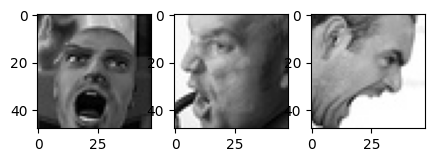

disgust :


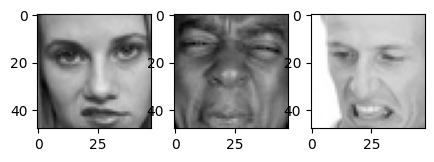

fear :


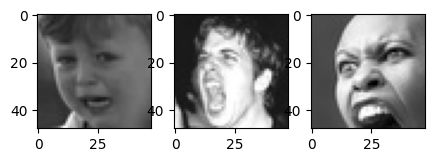

happy :


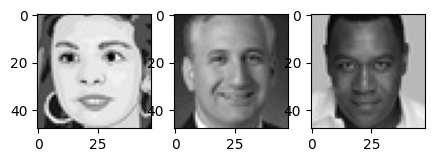

neutral :


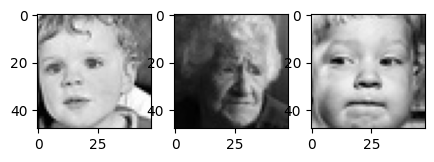

sad :


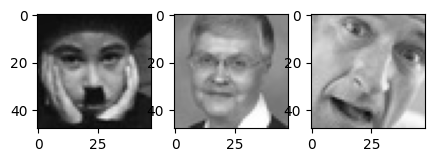

surprise :


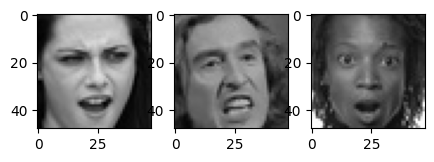

In [16]:
for exp in expressions:
    print(exp, ":")    
    
    plt.figure(figsize= (5,5))
    files = random.sample(os.listdir(folder_path + "train/" + exp), 3)
    
    for i, file in enumerate(files):
        plt.subplot(1, 3, i+1)
        
        img_path = folder_path + "train/" + exp + "/" + file
        img = load_img(img_path, target_size = (pixel_size, pixel_size))
        plt.imshow(img) 
    
    plt.show()

# Dataset Splitting

In [5]:
batch_size=128

train_set= ImageDataGenerator().flow_from_directory(folder_path + "train",
                                            target_size = (pixel_size, pixel_size),
                                            color_mode = "grayscale",
                                             batch_size = batch_size,
                                            class_mode = "categorical",
                                            shuffle = True)

test_set = ImageDataGenerator().flow_from_directory(folder_path + "validation",
                                       target_size = (pixel_size,pixel_size),
                                       color_mode = "grayscale",
                                       batch_size = batch_size,
                                       class_mode = "categorical",
                                       shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [9]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(pixel_size, pixel_size,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 batch_normalization_6 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)      

# Fitting the Model with Training and Validation Data

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

## Saving the model

In [23]:
model.save_weights('face_emotion_model.h5')

# Plotting the learning curves

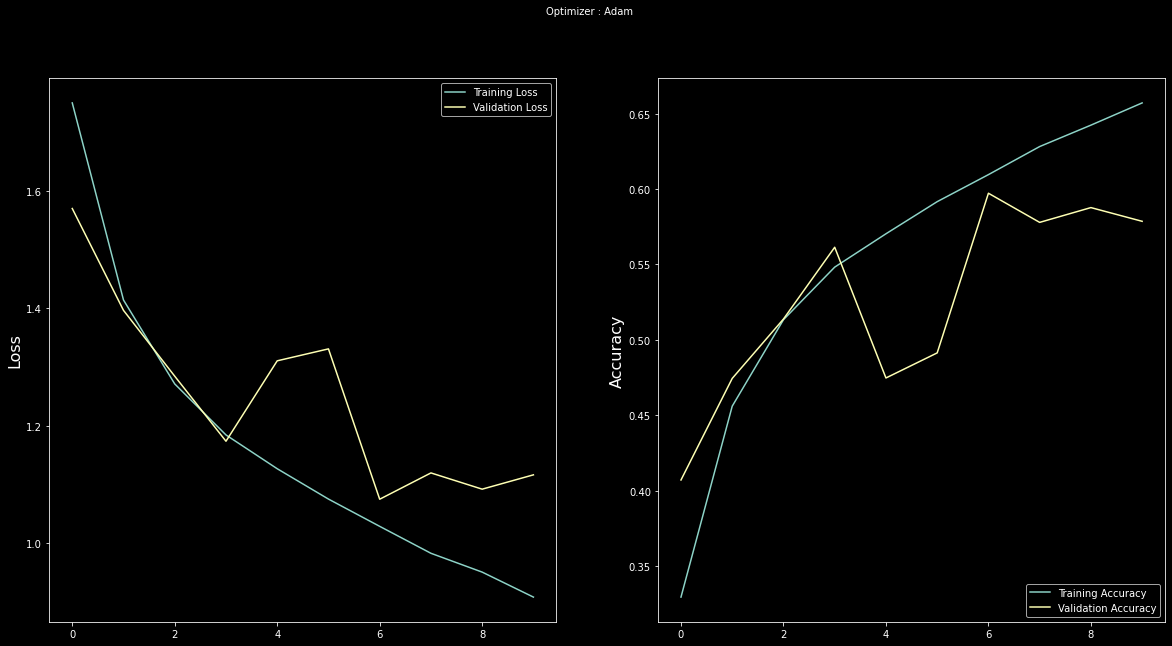

In [24]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()